In [12]:
import numpy as np
import pylab as plt

from sklearn.datasets import make_moons, make_blobs

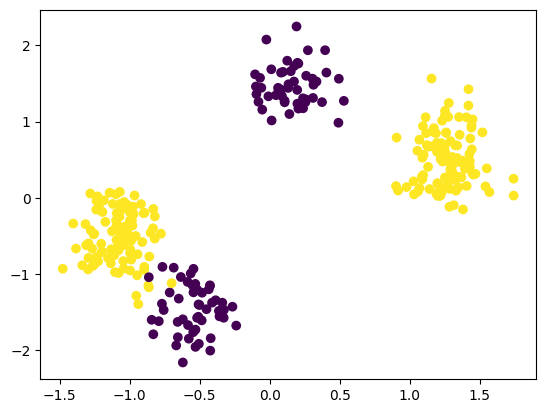

In [18]:
np.random.seed(1)
X, y = make_moons(200, noise=0.1)
X, y = make_blobs([50, 100, 50, 100])

X = (X - X.mean(0)) / X.std(0)
y %=2

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

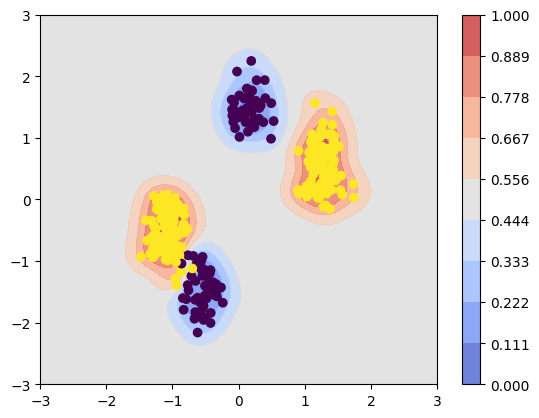

In [20]:
from sklearn.gaussian_process import GaussianProcessClassifier, kernels
kernel = 1*kernels.RBF(length_scale=.2)
model = GaussianProcessClassifier(kernel=kernel, optimizer=None)
model.fit(X, y)

domain = -3
xx, yy = np.meshgrid(np.linspace(-domain, domain, 101), np.linspace(-domain, domain, 101))
zz = np.c_[xx.ravel(), yy.ravel()]
probas = model.predict_proba(zz)[:, 1].reshape(xx.shape)
plt.contourf(xx, yy, probas, alpha=.8, levels=np.linspace(0, 1, 10), cmap='coolwarm')
plt.colorbar()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [21]:
def true_cross_entropy(model, X, y):
    y_probas = model.predict_proba(X)
    y_onehot = np.eye(2)[y_probas.argmax(axis=-1)].astype(int)
    losses = np.sum(y_onehot * - np.log(y_probas), axis=-1)
    return np.mean(losses)

def estimate_cross_entropy(model, X):
    y_probas = model.predict_proba(X)
    losses = np.sum(y_probas * - np.log(y_probas), axis=-1)
    return np.mean(losses)

In [22]:
y_pred = model.predict_proba(X)
true_cross_entropy(model, X, y), estimate_cross_entropy(model, X)

(0.15872855977758157, 0.38979063559140403)

In [37]:
from sklearn.linear_model import LogisticRegression

true_losses = []
estimated_losses = []
for n_samples in np.arange(2, len(X), 2):
    np.random.seed(1)
    rnd_idx = [np.random.choice(np.where(y == clss)[0], size=n_samples//2) for clss in np.unique(y)]
    rnd_idx = np.concatenate(rnd_idx)

    kernel = 10*kernels.RBF(length_scale=0.5)
    model = GaussianProcessClassifier(kernel=kernel, optimizer=None)
    # model = LogisticRegression()
    model.fit(X[rnd_idx], y[rnd_idx])

    domain = -3
    xx, yy = np.meshgrid(np.linspace(-domain, domain, 101), np.linspace(-domain, domain, 101))
    zz = np.c_[xx.ravel(), yy.ravel()]
    probas = model.predict_proba(zz)[:, 1].reshape(xx.shape)

    estimated_loss = estimate_cross_entropy(model, X)
    true_losses.append(true_cross_entropy(model, X, y))
    estimated_losses.append(estimate_cross_entropy(model, X))
    # plt.title('True Loss: {}  Estimated Loss: {}'.format(true_losses[-1], estimated_losses[-1]))
    # plt.contourf(xx, yy, probas, alpha=.8, levels=np.linspace(0, 1, 10), cmap='coolwarm')
    # plt.colorbar()
    # plt.scatter(X[rnd_idx, 0], X[rnd_idx, 1], c=y[rnd_idx])
    # plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    # plt.show()


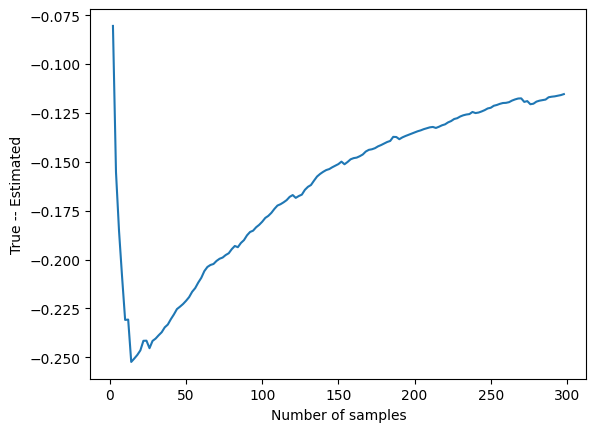

In [38]:
plt.plot(np.arange(2, len(X), 2), np.array(true_losses) - np.array(estimated_losses))
plt.xlabel('Number of samples')
plt.ylabel('True -- Estimated')
plt.show()

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [ ]:
# [0.2, 0.8]

0.2 * - np.log(0.2), 0.8 * - np.log(0.8), 0.2 * - np.log(0.2)+ 0.8 * - np.log(0.8)

(0.3218875824868201, 0.17851484105136778, 0.5004024235381879)

In [83]:

estimate_cross_entropy(model, X)

0.48777095377920526